Aula sobre analise de fundos de investimento pela Trading com Dados.
- TODO : Aplicar estratégia para escolher fundos com base em análise fundamentalista.

# **Analise de Fundos de Investimentos**

Objetivo: Como obter e analisar dados de fundos de investimentos
Responder as seguintes perguntas:
1. Qual fundo do Brasil tem o maior PL (patrimônio liquido)?
2. Como obter a variação da cota para um fundo específico?
3. Como recuperar dados de um fundo específico sabendo apenas o seu nome?
4. Qual o fundo que teve a cota que mais subiu?
5. Qual o fundo que teve a cota que mais caiu?

Fonte dos dados: portal de dados da CVM

# **0. Noções básicas**

### O que é um fundo de investimento?

**O que é um Fundo de Investimentos?**
Um fundo de investimentos funciona como uma espécie de condomínio.

Dentro de um fundo temos vários segmentos:

Existe a empresa administradora do fundo, o gestor, os profissionais que fazem a auditoria sobre os números do fundo e, por fim, mas não menos importante, os investidores, ou nesse caso, os cotistas.

Para simplificar a compreensão de um fundo, é sempre válido pensar nele exatamente como um condomínio:

As pessoas vivem juntas em um mesmo terreno, porque assim várias coisas acabam sendo divididas. Os custos para manutenção são compartilhados, a segurança, a área de lazer e diversas outras áreas.

O fundo de investimento parte da mesma prerrogativa: Porque investir sozinho, se o investidor pode fazer isso com mais pessoas, utilizando muito mais recursos e contratando um profissional ultra qualificado para cuidar de todo esse dinheiro?

É por isso que, em grande parte, os fundos funcionam como condomínios.

Fonte: https://maisretorno.com/portal/termos/f/fundo-de-investimentos

<center><img src = "https://blog.yubb.com.br/wp-content/uploads/2017/12/01.12.2017-fundos-de-investimento.png?raw=true" width = "500">

Fonte: https://blog.yubb.com.br/entenda-os-fundos-de-investimentos/

Ferramentas importantes para ajudar a analisar e comparar fundos de investimento

Portal de dados Anbima
https://data.anbima.com.br/

Mais Retorno
https://maisretorno.com/comparacao-fundos



1. Identificar os sites que farão parte da busca (cotas e cadastral)
2. Iniciar extração das cotas
3. Mostrar porque precisamos do cadastral
4. Obter e tratar o cadastral
5. Juntar os dois e começar as análises
6. Buscar fundo de maior PL
7. Buscar um fundo específico
8. Fundos que mais subiram e fundos que mais caíram

### O que faremos na nossa aula?

Vamos começar a nossa extração explorando as páginas da CVM que tem as informações que serão extraídas.

É muito importante que você adquira familiaridade com a página de dados abertos da CVM: https://dados.cvm.gov.br/

É lá que estão contidas informações importantes no mercado financeiro, como demonstrativos e balanços de empresas de capital aberto, informações cadastrais e de desempenho de fundos de investimento, dentre outros.

Nossa aula aqui será dividida em dois momentos principais. Primeiramente, vamos buscar as informações diárias de desempenho dos fundos, e posteriormente buscaremos também os dados cadastrais destes fundos. A partir disto, faremos algumas análises.

Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

# **1. Extração e processamento dos dados de desempenho**

## 1.1. Importação das bibliotecas

In [1]:
import zipfile
import io
import requests
import pandas as pd

## 1.2. Captura dos dados

In [2]:
arquivo = 'inf_diario_fi_202308.csv'

link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202308.zip'

In [3]:
r = requests.get(link)

In [4]:
r

<Response [200]>

In [5]:
zf = zipfile.ZipFile(io.BytesIO(r.content))

In [7]:
arquivo_fi = zf.open(arquivo)

In [8]:
linhas = arquivo_fi.readlines()

In [9]:
linhas = [i.strip().decode('ISO-8859-1') for i in linhas]

In [10]:
linhas = [i.split(';') for i in linhas]

In [11]:
linhas[0]

['TP_FUNDO',
 'CNPJ_FUNDO',
 'DT_COMPTC',
 'VL_TOTAL',
 'VL_QUOTA',
 'VL_PATRIM_LIQ',
 'CAPTC_DIA',
 'RESG_DIA',
 'NR_COTST']

In [12]:
df = pd.DataFrame(linhas, columns = linhas[0])

In [13]:
df

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
1,FI,00.017.024/0001-53,2023-08-01,1101441.42,32.897993900000,1106879.33,0.00,0.00,1
2,FI,00.017.024/0001-53,2023-08-02,1102008.01,32.912367200000,1107362.93,0.00,0.00,1
3,FI,00.017.024/0001-53,2023-08-03,1102567.38,32.926972300000,1107854.33,0.00,0.00,1
4,FI,00.017.024/0001-53,2023-08-04,1103126.46,32.940791500000,1108319.29,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
578644,FI,97.929.213/0001-34,2023-08-25,84412931.79,11.107729430000,84411205.20,0.00,0.00,2
578645,FI,97.929.213/0001-34,2023-08-28,84459070.59,11.113726200000,84456776.59,0.00,0.00,2
578646,FI,97.929.213/0001-34,2023-08-29,84695430.03,11.144754210000,84692568.40,0.00,0.00,2
578647,FI,97.929.213/0001-34,2023-08-30,84718705.72,11.147742230000,84715275.32,0.00,0.00,2


In [14]:
informes_diarios = df[1:].reset_index()

In [15]:
informes_diarios.dtypes

index             int64
TP_FUNDO         object
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         object
VL_QUOTA         object
VL_PATRIM_LIQ    object
CAPTC_DIA        object
RESG_DIA         object
NR_COTST         object
dtype: object

In [16]:
informes_diarios[['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST']] = informes_diarios[['VL_TOTAL', 
                                                                                                                     'VL_QUOTA', 
                                                                                                                     'VL_PATRIM_LIQ', 
                                                                                                                     'CAPTC_DIA', 
                                                                                                                     'RESG_DIA', 
                                                                                                                     'NR_COTST']].apply(pd.to_numeric)


In [17]:
informes_diarios.dtypes

index              int64
TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [18]:
informes_diarios.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,1,FI,00.017.024/0001-53,2023-08-01,1101441.42,32.897994,1106879.33,0.0,0.00,1
1,2,FI,00.017.024/0001-53,2023-08-02,1102008.01,32.912367,1107362.93,0.0,0.00,1
2,3,FI,00.017.024/0001-53,2023-08-03,1102567.38,32.926972,1107854.33,0.0,0.00,1
3,4,FI,00.017.024/0001-53,2023-08-04,1103126.46,32.940792,1108319.29,0.0,0.00,1
4,5,FI,00.017.024/0001-53,2023-08-07,1100901.02,32.955173,1106116.33,0.0,2686.84,1


In [19]:
informes_diarios.shape

(578648, 10)

# **2. Análises preliminares**

Já entendemos que a planilha traz um mês inteiro para todos os fundos. E se quiséssemos trazer um dia específico para todos os fundos?

Vamos primeiramente entender quais dias estão disponíveis na planilha.

In [20]:
informes_diarios.DT_COMPTC.unique()

array(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
       '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
       '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
       '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
       '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
       '2023-08-29', '2023-08-30', '2023-08-31'], dtype=object)

## 2.1. Comparativo de PL

In [21]:
informes_diarios[informes_diarios['DT_COMPTC'] == '2023-08-31']

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
22,23,FI,00.017.024/0001-53,2023-08-31,1.109815e+06,33.212527,1.114754e+06,0.00,0.00,1
45,46,FI,00.068.305/0001-35,2023-08-31,3.797025e+07,34.126535,3.797347e+07,0.00,2109.96,6084
68,69,FI,00.071.477/0001-68,2023-08-31,2.181617e+09,12.220680,2.181469e+09,75875.42,5901730.66,50321
91,92,FI,00.073.041/0001-08,2023-08-31,1.225601e+07,35.951223,1.224972e+07,0.00,0.00,798
114,115,FI,00.083.181/0001-67,2023-08-31,1.733919e+10,838.175825,1.731715e+10,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...
578555,578556,FI,97.548.164/0001-90,2023-08-31,6.116903e+07,0.155407,6.114777e+07,0.00,0.00,1
578578,578579,FI,97.548.167/0001-23,2023-08-31,4.659581e+09,4.635738,4.668707e+09,1290170.00,11051256.80,12
578601,578602,FI,97.711.801/0001-05,2023-08-31,9.038313e+07,3.021746,9.035648e+07,0.00,0.00,1
578624,578625,FI,97.929.197/0001-80,2023-08-31,1.372753e+08,5.581802,1.371553e+08,0.00,0.00,12


Temos 25181 fundos!

In [23]:
comparativo = informes_diarios[informes_diarios['DT_COMPTC'] == '2023-08-31']

In [24]:
comparativo.sort_values('VL_PATRIM_LIQ')

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
465686,465687,FI,42.561.596/0001-49,2023-08-31,-3.033194e+07,-6.679899,-3.038018e+07,0.000000e+00,0.000000e+00,2
278823,278824,FI,32.222.977/0001-40,2023-08-31,-1.629040e+07,-4943.228595,-1.631275e+07,0.000000e+00,0.000000e+00,16
104807,104808,FI,13.593.438/0001-72,2023-08-31,1.264308e+08,-3.633436,-4.704543e+06,0.000000e+00,0.000000e+00,5
162925,162926,FI,20.726.235/0001-72,2023-08-31,4.224007e+07,-0.508230,-6.610744e+05,0.000000e+00,0.000000e+00,1
439194,439195,FI,41.673.481/0001-83,2023-08-31,-4.139189e+05,-167.879251,-5.708902e+05,0.000000e+00,0.000000e+00,2
...,...,...,...,...,...,...,...,...,...,...
3770,3771,FI,01.597.187/0001-15,2023-08-31,9.465439e+10,319.835420,9.466592e+10,6.458566e+08,7.531435e+08,45
1079,1080,FI,00.822.055/0001-87,2023-08-31,1.062412e+11,51.573189,1.062400e+11,6.438000e+06,0.000000e+00,1
520735,520736,FI,46.133.770/0001-03,2023-08-31,1.311032e+11,115.563935,1.311020e+11,4.040438e+09,4.117582e+09,1
466513,466514,FI,42.592.315/0001-15,2023-08-31,1.311133e+11,1.187525,1.311117e+11,4.040438e+09,4.108546e+09,38073


In [25]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

Repare que não conseguimos saber por aqui que fundo é este porque não temos as informações cadastrais.

## 2.2. Variação da cota

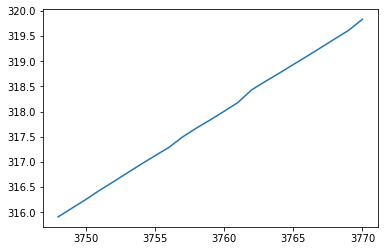

In [26]:
fundo = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '01.597.187/0001-15']

fundo.VL_QUOTA.plot();

# **3. Análises com dados cadastrais**

## 3.1. Extração dos dados de cadastro

In [27]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [28]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')

C:\Users\alan_\AppData\Local\Temp\ipykernel_29244\1026769091.py:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


In [29]:
cadastral.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cadastral.shape

(74048, 41)

## 3.2. Fundo de maior PL (patrimônio líquido)


In [31]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

In [32]:
cadastral[cadastral['CNPJ_FUNDO'] == '07.593.972/0001-86']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12165,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


In [33]:
cadastral[cadastral['CNPJ_FUNDO'] == comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12165,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


## 3.3. Retornando algum fundo específico de acordo com o CNPJ

In [34]:
cadastral[cadastral['CNPJ_FUNDO'] == '32.222.977/0001-40']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
38370,FI,32.222.977/0001-40,FRAM CAPITAL FIMP FUNDO DE INVESTIMENTO MULTIM...,2018-12-17,2018-11-29,314382.0,NaN,EM FUNCIONAMENTO NORMAL,2019-01-09,2019-01-09,...,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,42.170.852/0001-77,UHY BENDORAYTES & CIA AUDITORES INDEPENDENTES,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,N,Multimercados Estrat. Específica


## 3.4. Retornando um fundo de acordo com o nome

In [35]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK') ]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
20636,FI,12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,2010-07-31,2010-06-02,145238.0,NaN,EM FUNCIONAMENTO NORMAL,2010-09-17,2010-09-17,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21688,FI,12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2011-01-12,2011-01-12,154849.0,NaN,EM FUNCIONAMENTO NORMAL,2011-01-24,2011-01-24,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
26419,FI,17.634.289/0001-01,ALFA ALASKA BLACK - FIC FI EM AÇÕES - BDR NÍV...,2017-08-02,2013-01-28,283100.0,2017-12-13,CANCELADA,2017-12-13,2017-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
33474,FI,26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2016-12-29,2016-12-28,270652.0,NaN,EM FUNCIONAMENTO NORMAL,2017-01-03,2017-01-03,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
35127,FI,28.504.479/0001-12,ALFA ALASKA BLACK INSTITUCIONAL - FUNDO DE INV...,2017-11-20,2017-03-21,289450.0,2022-03-04,CANCELADA,2022-03-04,2017-12-08,...,60.770.336/0001-65,BANCO ALFA DE INVESTIMENTO S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,NaN
38971,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38972,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38981,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38982,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38988,FI,32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,2019-08-29,2019-08-27,334758.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre


In [36]:
alaskas = cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK') & cadastral['GESTOR'].str.contains('ALASKA INVESTIMENTOS LTDA.')]

In [37]:
alaskas.CNPJ_FUNDO

20636    12.055.107/0001-16
21688    12.987.743/0001-86
33474    26.648.868/0001-96
38971    32.757.743/0001-05
38981    32.760.103/0001-46
38988    32.761.323/0001-94
42204    35.939.700/0001-20
42210    35.939.857/0001-56
Name: CNPJ_FUNDO, dtype: object

In [38]:
alaskas.index

Int64Index([20636, 21688, 33474, 38971, 38981, 38988, 42204, 42210], dtype='int64')

Analisando os fundos

In [39]:
fundo_df = pd.DataFrame(columns = ['Fundo', 'Classe', 'PL'])

In [40]:
fundo_df

,Fundo,Classe,PL


In [41]:
for cnpj in alaskas.CNPJ_FUNDO:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [42]:
fundo_df

,Fundo,Classe,PL
12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,Fundo de Ações,1.500034e+09
12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,1.219091e+09
26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,2.808664e+08
32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,Fundo Multimercado,6.208898e+07
32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,Fundo Multimercado,1.334439e+08
32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,Fundo Multimercado,1.620055e+07
35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,Fundo Multimercado,2.984213e+07
35.939.857/0001-56,ALASKA BLACK 100 ADV XP SEGUROS PREVIDENCIÁRIO...,Fundo Multimercado,4.009214e+07


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

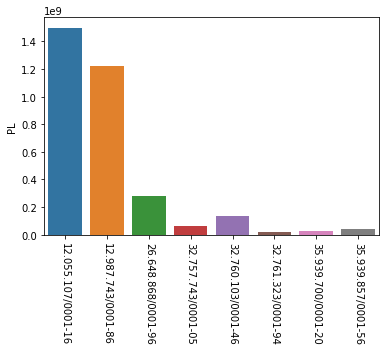

In [44]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.PL)
plt.xticks(rotation=270);

## 3.5. Fundos que mais subiram e que mais caíram

### 3.5.1. Manipulações iniciais nos dados

Filtrando fundos pelo número de cotistas

In [45]:
filtro = informes_diarios[informes_diarios['NR_COTST']> 1000]

In [46]:
filtro.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
23,24,FI,00.068.305/0001-35,2023-08-01,38146599.43,33.765570,38140273.11,0.0,6507.17,6111
24,25,FI,00.068.305/0001-35,2023-08-02,38171349.17,33.785428,38162704.68,0.0,0.00,6111
25,26,FI,00.068.305/0001-35,2023-08-03,38191579.87,33.802958,38180609.63,0.0,1895.89,6109
26,27,FI,00.068.305/0001-35,2023-08-04,38212193.58,33.819188,38198902.64,0.0,38.53,6108
27,28,FI,00.068.305/0001-35,2023-08-07,38160740.35,33.834391,38144962.55,0.0,71111.87,6106


In [47]:
fundos = filtro.pivot(index = 'DT_COMPTC', columns = 'CNPJ_FUNDO', values = ['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ'])

Para calcular o retorno dos fundos, vamos normalizar o valor das cotas

In [48]:
normalizados = fundos['VL_QUOTA']/fundos['VL_QUOTA'].iloc[0]

In [49]:
normalizados

CNPJ_FUNDO,00.068.305/0001-35,00.071.477/0001-68,00.222.725/0001-24,00.222.816/0001-60,00.280.302/0001-60,00.306.278/0001-91,00.322.699/0001-06,00.360.293/0001-18,00.398.561/0001-90,00.400.490/0001-13,...,60.906.179/0001-72,67.976.449/0001-60,68.599.141/0001-06,68.623.479/0001-56,68.670.512/0001-07,73.899.759/0001-21,88.002.696/0001-36,88.198.056/0001-43,97.519.703/0001-62,97.519.794/0001-36
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2023-08-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-08-02,1.000588,1.000442,1.000485,1.000708,1.000627,1.000521,1.000580,1.001418,0.993952,1.002123,...,1.000523,0.996732,1.000449,1.000588,0.975868,0.996731,0.997128,1.010028,1.000672,1.000525
2023-08-03,1.001107,1.000896,1.001211,1.001482,1.001114,1.001065,1.001182,1.015993,0.992204,1.006490,...,1.001071,0.994409,1.000898,1.001108,0.964554,0.994434,0.995741,1.018282,1.001085,1.001047
2023-08-04,1.001588,1.001333,1.001770,1.002012,1.001700,1.001604,1.001758,1.013676,0.989023,1.004821,...,1.001610,0.985440,1.001338,1.001589,0.952632,0.985496,0.988363,1.022622,1.001458,1.001607
2023-08-07,1.002038,1.001766,1.002205,1.002140,1.002093,1.002148,1.002335,1.019972,0.987418,1.003267,...,1.002156,0.984349,1.001782,1.002039,0.950474,0.984448,0.986437,1.010669,1.001719,1.002125
2023-08-08,1.002542,1.002203,1.002753,1.003163,1.002944,1.002692,1.002918,1.021264,0.985150,1.003246,...,1.002702,0.981894,1.002219,1.002543,0.942134,0.982016,0.984695,1.007894,1.002286,1.002655
2023-08-09,1.003085,1.002631,1.003186,1.003679,1.003339,1.003242,1.003499,1.022585,0.976726,1.000839,...,1.003255,0.976211,1.002651,1.003086,0.932713,0.976372,0.977745,1.002058,1.002849,1.003185
2023-08-10,1.003578,1.003052,1.003684,1.004517,1.003853,1.003741,1.004038,1.015372,0.977064,1.001764,...,1.003757,0.975639,1.003076,1.003580,0.927988,0.975821,0.975910,1.000602,1.003620,1.003692
2023-08-11,1.004148,1.003473,1.004428,1.005350,1.004396,1.004262,1.004617,1.021376,0.970738,1.004139,...,1.004278,0.973231,1.003497,1.004150,0.925255,0.973432,0.971156,1.000300,1.004712,1.004195


In [50]:
cotas_normalizadas = pd.DataFrame(normalizados.iloc[-1])

In [51]:
cotas_normalizadas.sort_values('2023-08-31', ascending = False)[:5]

,2023-08-31
CNPJ_FUNDO,
40.503.169/0001-89,1.101075
34.218.740/0001-10,1.091169
08.336.054/0001-34,1.076299
11.060.594/0001-42,1.076066
24.454.718/0001-16,1.054011


In [ ]:
cotas_normalizadas = cotas_normalizadas.rename(columns={'2023-08-31': 'Rendimento'})

### **Maiores altas**

In [52]:
altas = (cotas_normalizadas.sort_values('Rendimento', ascending = False)[:5]['Rendimento'] - 1)*100

In [53]:
fundo_df = pd.DataFrame(columns = ['retornos', 'Fundo', 'Classe', 'PL'])

In [54]:
fundo_df

,retornos,Fundo,Classe,PL


In [55]:
altas.index

Index(['40.503.169/0001-89', '34.218.740/0001-10', '08.336.054/0001-34',
       '11.060.594/0001-42', '24.454.718/0001-16'],
      dtype='object', name='CNPJ_FUNDO')

In [57]:
for cnpj in altas.index:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [altas[altas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [58]:
fundo_df

,retornos,Fundo,Classe,PL
40.503.169/0001-89,10.107455,VITREO URANIO FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,4.637658e+07
34.218.740/0001-10,9.116947,TREND CANNABIS FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,2.411834e+07
08.336.054/0001-34,7.629897,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETRO...,Fundo de Ações,1.277367e+08
11.060.594/0001-42,7.606607,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS...,Fundo de Ações,9.147295e+07
24.454.718/0001-16,5.401112,JPMORGAN DOLAR GLOBAL MACRO OPPORTUNITIES FI M...,Fundo Multimercado,1.430535e+08


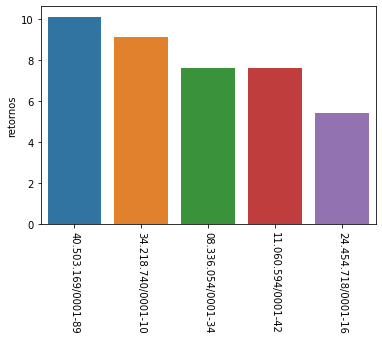

In [59]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.retornos)
plt.xticks(rotation=270);

### **Maiores quedas**

In [60]:
baixas = (cotas_normalizadas.sort_values('Rendimento', ascending = True)[:5]['Rendimento'] - 1)*100

In [61]:
baixas

CNPJ_FUNDO
10.590.125/0001-72   -19.391173
10.869.628/0001-81   -19.217062
11.182.072/0001-13   -19.211365
18.832.847/0001-06   -16.303957
41.033.759/0001-58   -12.491931
Name: 2023-08-31, dtype: float64

In [62]:
fundo_df = pd.DataFrame(columns = ['retornos', 'Fundo', 'Classe', 'PL'])

In [63]:
fundo_df

,retornos,Fundo,Classe,PL


In [64]:
baixas.index

Index(['10.590.125/0001-72', '10.869.628/0001-81', '11.182.072/0001-13',
       '18.832.847/0001-06', '41.033.759/0001-58'],
      dtype='object', name='CNPJ_FUNDO')

In [65]:
for cnpj in baixas.index:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [baixas[baixas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [66]:
fundo_df

,retornos,Fundo,Classe,PL
10.590.125/0001-72,-19.391173,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES CIELO,Fundo de Ações,1.123556e+07
10.869.628/0001-81,-19.217062,BB AÇÕES CIELO FUNDO DE INVESTIMENTO,Fundo de Ações,3.639862e+07
11.182.072/0001-13,-19.211365,LOGOS TOTAL RETURN FI EM COTAS DE FUNDOS DE IN...,Fundo Multimercado,1.501830e+08
18.832.847/0001-06,-16.303957,VERSA LONG BIASED FUNDO DE INVESTIMENTO MULTIM...,Fundo Multimercado,9.723841e+07
41.033.759/0001-58,-12.491931,EMPIRICUS CRIPTO HIGH BETA FIC FI MULTIMERCADO...,Fundo Multimercado,2.104943e+07


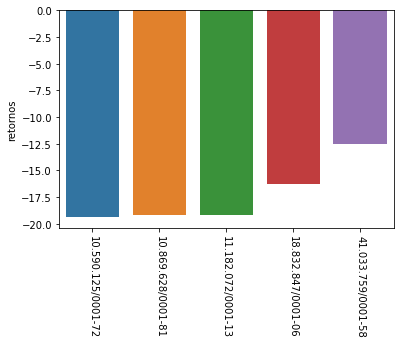

In [67]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.retornos)
plt.xticks(rotation=270);